In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [3]:
cancer=pd.read_excel('Downloads/cancer patient data sets.xlsx', header=None)
new_header=cancer.iloc[0]
cancer=cancer[1:]
cancer.columns=new_header
cancer.info()
cancer.head()
cancer_label=cancer.columns
for label in cancer_label:
    print('***', label,'labels:',cancer[label].unique())

cancer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   object
 4   Alcohol use               1000 non-null   object
 5   Dust Allergy              1000 non-null   object
 6   OccuPational Hazards      1000 non-null   object
 7   Genetic Risk              1000 non-null   object
 8   chronic Lung Disease      1000 non-null   object
 9   Balanced Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive Smoker            1000 non-null   object
 13  Chest Pain                1000 non-null   object
 14  Coughing of Blood       

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None,  fontsize=12, fontweight=None, legend=True, save=False,save_name=None):
    ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)

    if legend==True:
        plt.legend()
    else:
        ax.legend().remove()
        
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')

    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save==True:
        plt.savefig(save_name)

<Axes: xlabel='Level', ylabel='Count'>

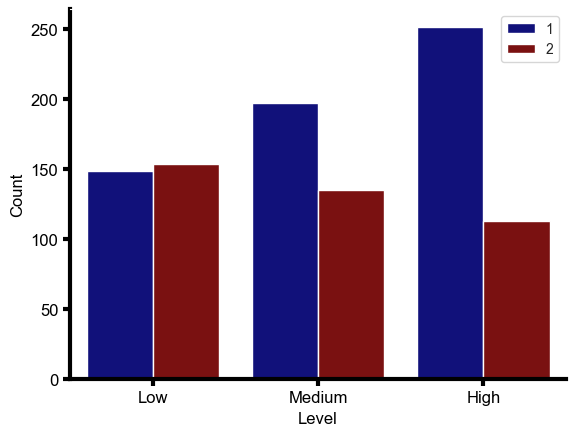

In [5]:
fig, ax=plt.subplots()
plot=sns.countplot(data=cancer, x='Level', hue='Gender', palette=['darkblue','darkred'])
Plotter(plot, 'Level', 'Count', legend=True, save=True, save_name='Level Count by Gender.png')
plot

<Axes: xlabel='Alcohol use', ylabel='Fatigue'>

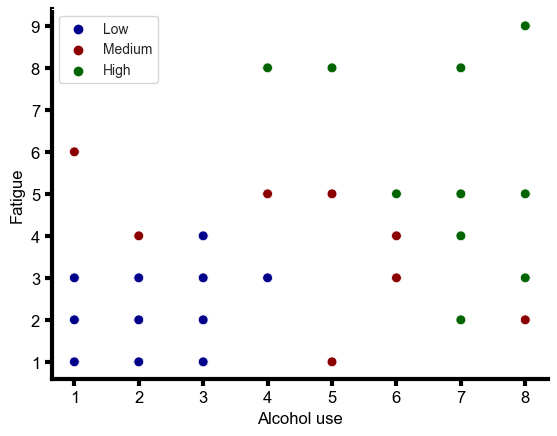

In [20]:
fig, ax=plt.subplots()
plot=sns.scatterplot(data=cancer, x='Alcohol use',y='Fatigue', hue='Level', palette=['darkblue','darkred','darkgreen'], s=50, marker='o')
Plotter(plot, 'Alcohol use', 'Fatigue', legend=True, save=True, save_name='Level Dependence on Alcohol and Fatigue.png')
plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Level', ylabel='Age'>

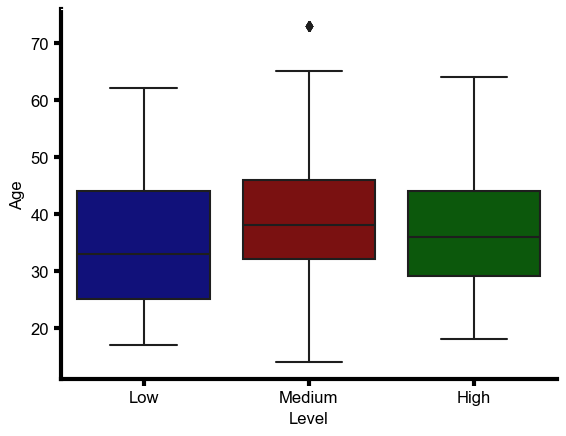

In [7]:
fig, ax=plt.subplots()
plot=sns.boxplot(data=cancer, x='Level', y='Age', palette=['darkblue','darkred','darkgreen'])
Plotter(plot, 'Level', 'Age', legend=False, save=True, save_name='Level by Age.png')
plot

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.2 MB 660.6 kB/s eta 0:00:13
     ---------------------------------------- 0.1/8.2 MB 825.8 kB/s eta 0:00:10
     ---------------------------------------- 0.1/8.2 MB 563.7 kB/s eta 0:00:15
     ---------------------------------------- 0.1/8.2 MB 585.1 kB/s eta 0:00:14
      --------------------------------------- 0.1/8.2 MB 610.6 kB/s eta 0:00:14
      --------------------------------------- 0.2/8.2 MB 573.4 kB/s eta 0:00:15
      --------------------------------------- 0.2/8.2 MB 551.6 kB/s eta 0:00:15
      --------------------------------------- 0.2/8.2 MB 567.2 kB/s eta 0:00:15
     - -------------------------------------- 0.2/8.2 MB 551.4 kB/s eta 0:00:15
     - -------------------------------------- 0.2/8.2 MB 515.5 kB/s eta 0:00:16
     - -------------------------------------- 0.3/8.2 MB 507.8 kB/s eta 0:00:16
     - -------------------------------------- 0.3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Score', ylabel='Feature'>

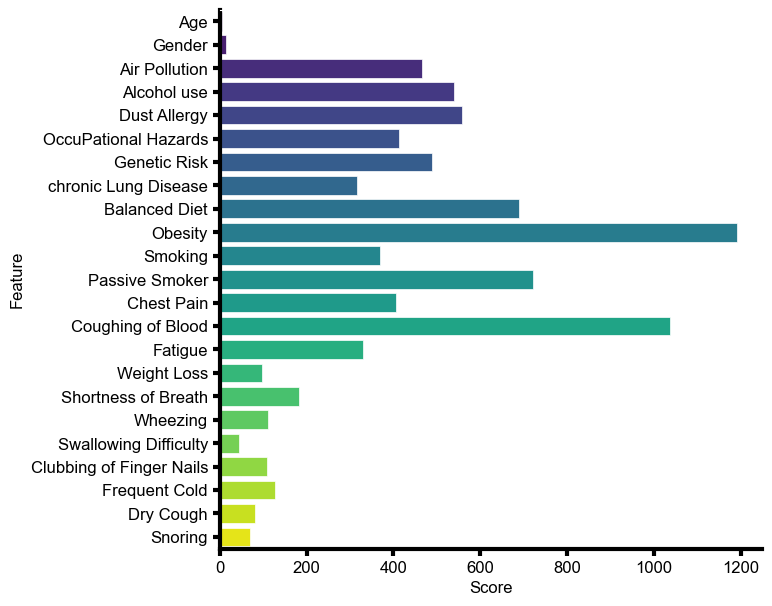

In [11]:
X=cancer.drop(['Level','Patient Id'], axis=1)
Y=cancer['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  


fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
Plotter(plot, 'Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png')#Plotter function for aesthetics
plot

In [12]:
selection=featureScores[featureScores['Score']>=200]
selection=list(selection['Feature'])
selection.append('Level')
new_cancer=cancer[selection]
new_cancer.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
1,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
2,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
3,4,5,6,5,5,4,6,7,2,3,4,8,8,High
4,7,7,7,7,6,7,7,7,7,7,7,8,4,High
5,6,8,7,7,7,6,7,7,8,7,7,9,3,High


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(new_cancer.drop(['Level'], axis=1), new_cancer['Level'],test_size=0.25, random_state=0)

print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (750, 13)
Y_train shape : (750,)
X_test shape : (250, 13)
Y_test shape : (250,)


In [15]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=scaler.transform(X_test)

In [16]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools

In [17]:
def Searcher(estimator, param_grid, search, train_x, train_y, test_x, test_y,label=None):
    
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, 
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) 
        
    clf.fit(X=train_x, y=train_y)
    
    
    try:
        if search=='grid':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))
        

            print("**Grid search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
        elif search == 'random':
            cfmatrix=confusion_matrix(
            y_true=test_y, y_pred=clf.predict(test_x))


          
            print("**Random search results of", label,"**")
            print("The best parameters are:",clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print('Classification Report:')
            print(classification_report(y_true=test_y, y_pred=clf.predict(test_x))
             )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0) 
        
    return clf, cfmatrix;

In [18]:
def plot_confusion_matrix(cm, label,color=None,title=None):
    
    classes=sorted(label)
    plt.imshow(cm, interpolation='nearest', cmap=color)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black") 

C:\Users\Abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

**Grid search results of SVC Grid **
The best parameters are: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 1}
Best training accuracy:	 1.0
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       1.00      1.00      1.00        85
      Medium       1.00      1.00      1.00        74

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

____________________________________________________________________________________________________
**Random search results of SVC Random **
The best parameters are: {'random_state': 1, 'kernel': 'rbf', 'gamma': 0.86, 'C': 0.61}
Best training accuracy:	 1.0
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       1.00      1.00      1.00        85
 

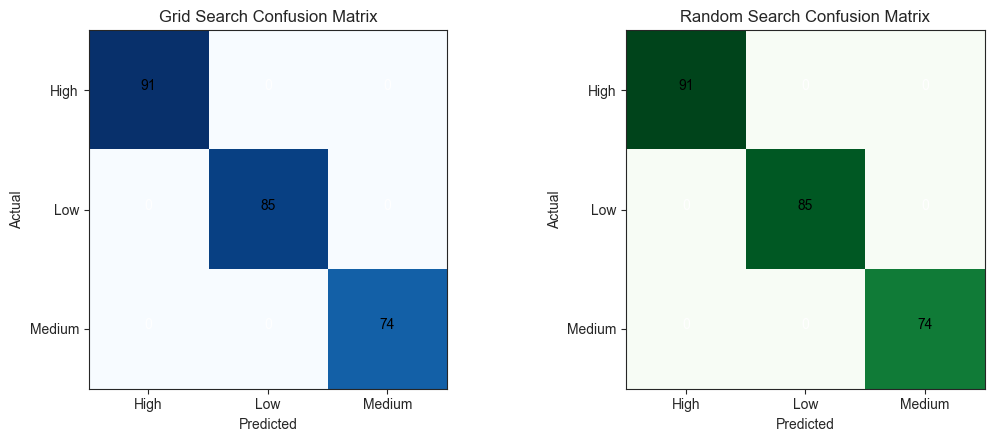

In [19]:
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100],
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf","linear""poly"],
    "random_state": [1]}


svm_dist = {
    "C": np.arange(0.01,2, 0.01),  
    "gamma": np.arange(0,1, 0.01),
    "kernel": ["rbf","linear""poly"],
    "random_state": [1]}

svm_grid, cfmatrix_grid= Searcher(SVC(), svm_param, "grid", X_train_scaled, y_train, X_test_scaled, y_test,label='SVC Grid')

print('_____'*20)


svm_rand, cfmatrix_rand= Searcher(SVC(), svm_dist, "random", X_train_scaled, y_train, X_test_scaled, y_test,label='SVC Random')


plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix',label=new_cancer['Level'].unique(), color=plt.cm.Greens) #grid matrix function
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=new_cancer['Level'].unique(), color=plt.cm.Blues) #randomized matrix function

plt.savefig('confusion.png')